In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


## Dataset Overview

In [4]:
df = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')

In [5]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
df.shape

(101, 11)

In [7]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [8]:
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [9]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [10]:
df = df.dropna(how='any',axis=0) 
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Age distribution')

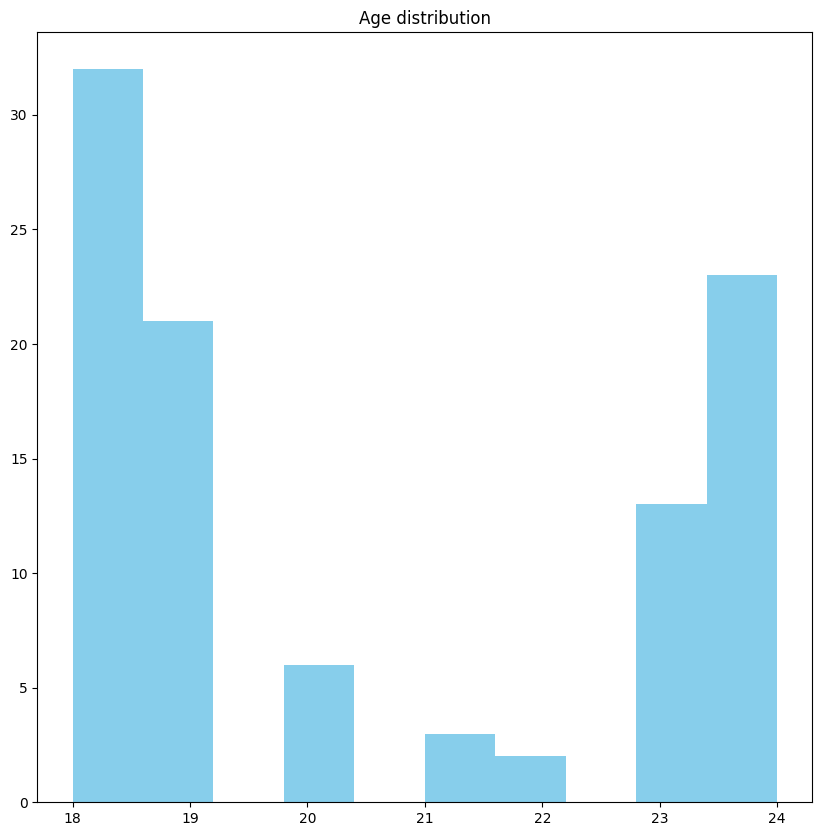

In [11]:
plt.figure(figsize=(10,10))
plt.hist(df['Age'],color='skyblue')
plt.title("Age distribution")

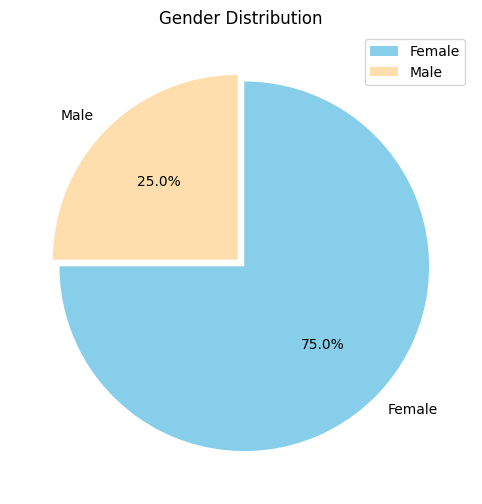

In [13]:
df.rename(columns = {'Choose your gender': 'gender'}, inplace = True)
plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
g = plt.pie(df.gender.value_counts(), explode=(0.025,0.025), labels=df.gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

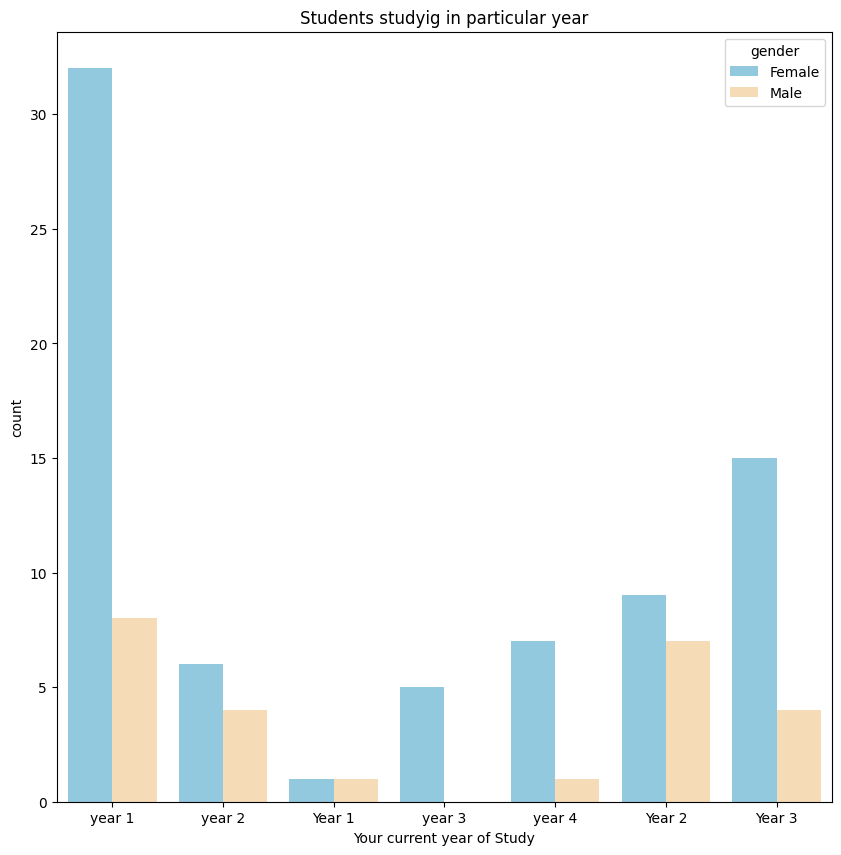

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Your current year of Study'],hue=df['gender'], palette=['skyblue','navajowhite'])
plt.title("Students studyig in particular year");

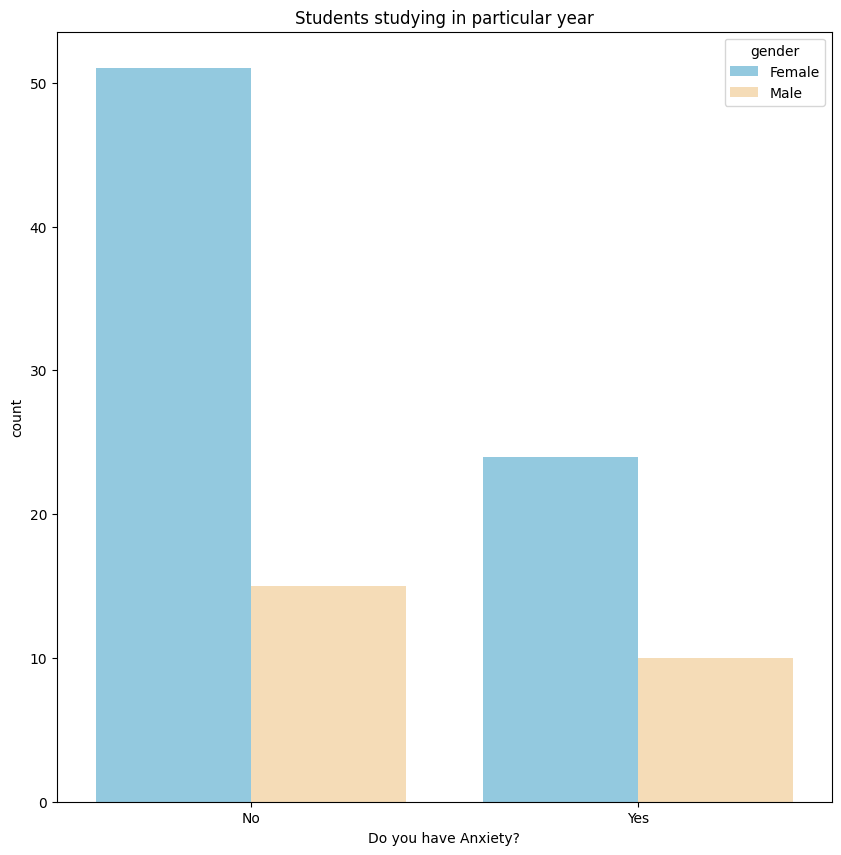

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Do you have Anxiety?'],hue=df['gender'], palette=['skyblue','navajowhite'])
plt.title("Students studying in particular year");
plt.show()

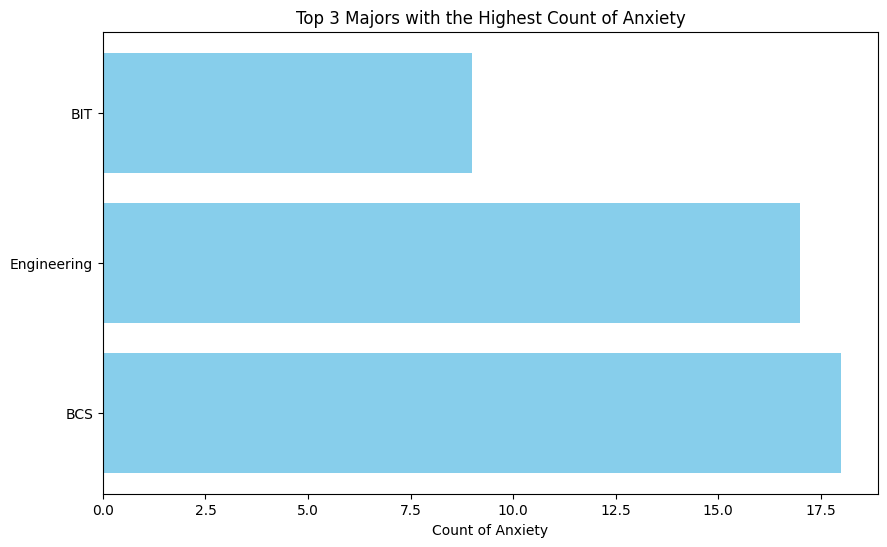

In [19]:
major_anxiety = df.groupby('What is your course?')['Do you have Anxiety?'].count().reset_index()
top3_major_anxiety = major_anxiety.nlargest(3, 'Do you have Anxiety?')

plt.figure(figsize=(10, 6))
plt.barh(top3_major_anxiety['What is your course?'], top3_major_anxiety['Do you have Anxiety?'], color='skyblue')
plt.xlabel('Count of Anxiety')
plt.title('Top 3 Majors with the Highest Count of Anxiety')
plt.show()

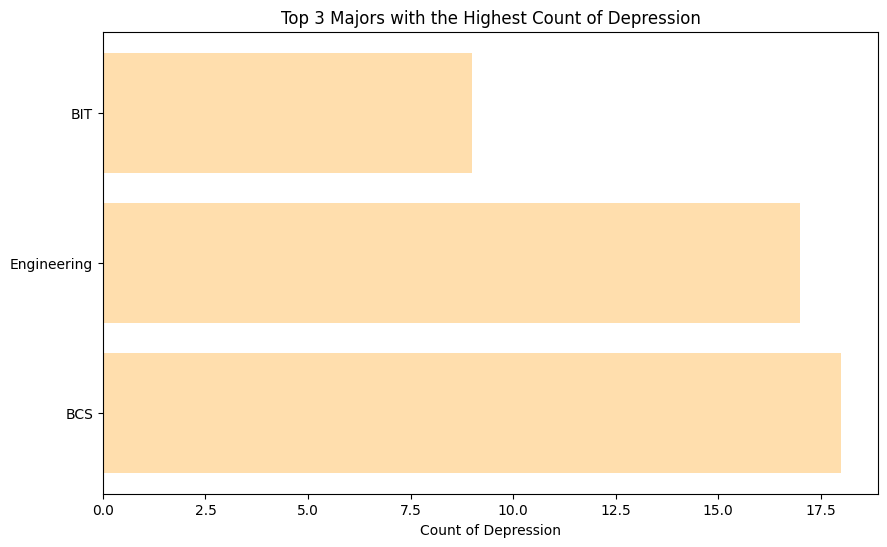

In [20]:
major_depress = df.groupby('What is your course?')['Do you have Depression?'].count().reset_index()
top3_major_depress = major_depress.nlargest(3, 'Do you have Depression?')

plt.figure(figsize=(10, 6))
plt.barh(top3_major_depress['What is your course?'], top3_major_depress['Do you have Depression?'], color='navajowhite')
plt.xlabel('Count of Depression')
plt.title('Top 3 Majors with the Highest Count of Depression')
plt.show()

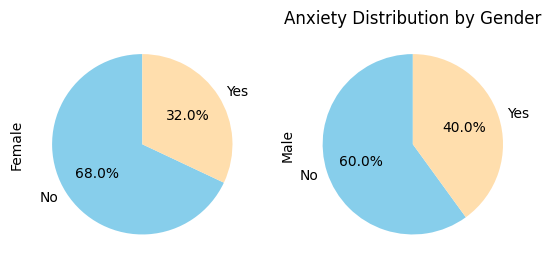

In [21]:
anxiety_gender_count = df.groupby(['Do you have Anxiety?', 'gender']).size().reset_index(name='count')

# Pivot the dataframe for better plotting
anxiety_gender_pivot = anxiety_gender_count.pivot(index='Do you have Anxiety?', columns='gender', values='count')

# Plotting a pie chart
colors = ['skyblue','navajowhite']
anxiety_gender_pivot.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, colors=colors, legend=False)



plt.title("Anxiety Distribution by Gender")
plt.show()

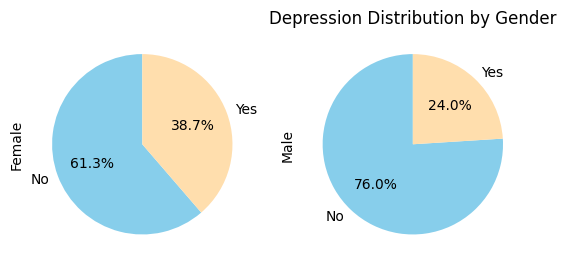

In [22]:
depression_gender_count = df.groupby(['Do you have Depression?', 'gender']).size().reset_index(name='count')

# Pivot the dataframe for better plotting
depression_gender_pivot = depression_gender_count.pivot(index='Do you have Depression?', columns='gender', values='count')

# Plotting a pie chart
colors = ['skyblue','navajowhite']
depression_gender_pivot.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, colors=colors, legend=False)

plt.title("Depression Distribution by Gender")
plt.show()